<a href="https://colab.research.google.com/github/P1MAHESH/8-x-8-rock_game_python/blob/main/Word_cloud.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


Number of unique words: 622

Top 20 Words (ascending order):
the: 58
to: 33
and: 31
in: 29
of: 27
a: 21
on: 15
for: 12
india: 11
he: 9
her: 9
at: 8
with: 7
was: 7
chief: 7
from: 7
that: 7
music: 7
over: 6
day: 5

Stop words dictionary created.


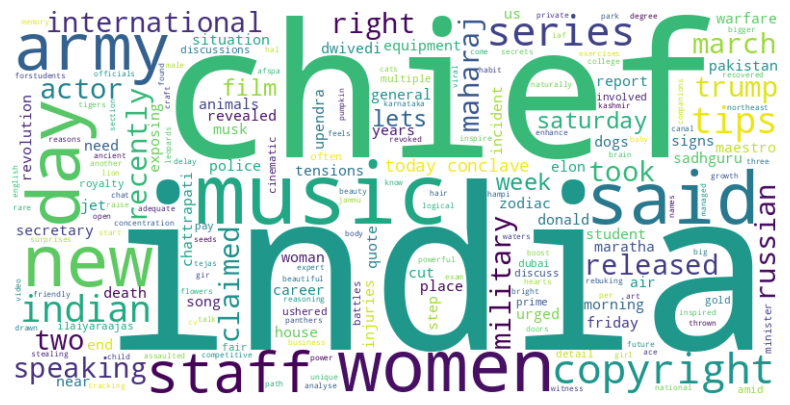

In [1]:
import requests
from bs4 import BeautifulSoup
from collections import Counter
import nltk
from nltk.corpus import stopwords
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import re

# Download NLTK stop words if you don't have them
nltk.download('stopwords')

# Function to get the content of the top 50 articles (in this case, using web scraping)
def get_articles():
    urls = [
        "https://timesofindia.indiatimes.com/",
        "https://www.ndtv.com/",
        "https://www.indiatoday.in/",
        # Add more URLs for different sources
    ]

    articles = []
    for url in urls:
        # Get the page content
        response = requests.get(url)
        soup = BeautifulSoup(response.text, 'html.parser')

        # Extract article content (this is a simplified method, adjust as necessary)
        paragraphs = soup.find_all('p')  # Get all paragraphs
        text = ' '.join([para.get_text() for para in paragraphs])
        articles.append(text)

        # If you want more specific scraping, you can extract specific elements.

    return articles

# Function to clean and process the text
def clean_text(text):
    text = text.lower()  # Convert text to lowercase
    text = re.sub(r'[^a-zA-Z\s]', '', text)  # Remove non-alphabetical characters
    return text

# Function to count unique words
def count_unique_words(articles):
    all_text = ' '.join(articles)  # Combine all articles
    clean = clean_text(all_text)  # Clean the text
    words = clean.split()  # Split text into words
    unique_words = set(words)  # Get unique words
    return len(unique_words), unique_words

# Function to get the top 20 words by frequency
def top_words(articles, n=20):
    all_text = ' '.join(articles)  # Combine all articles
    clean = clean_text(all_text)  # Clean the text
    words = clean.split()  # Split text into words
    word_counts = Counter(words)  # Count word frequencies
    return word_counts.most_common(n)

# Function to create a stop words dictionary
def create_stop_words():
    stop_words = stopwords.words('english')
    stop_words_dict = {word: True for word in stop_words}
    return stop_words_dict

# Function to generate a word cloud
def generate_word_cloud(articles):
    all_text = ' '.join(articles)  # Combine all articles
    clean = clean_text(all_text)  # Clean the text

    # Generate the word cloud
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(clean)

    # Display the word cloud
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.show()

# Main execution
if __name__ == "__main__":
    # Get the articles
    articles = get_articles()

    # Count the number of unique words
    unique_word_count, unique_words = count_unique_words(articles)
    print(f"Number of unique words: {unique_word_count}")

    # List the top 20 words in ascending order
    top_20_words = top_words(articles, 20)
    print("\nTop 20 Words (ascending order):")
    for word, count in top_20_words:
        print(f"{word}: {count}")

    # Create stop words dictionary
    stop_words_dict = create_stop_words()
    print("\nStop words dictionary created.")

    # Generate and display a word cloud
    generate_word_cloud(articles)
